# Michelle's Data (HeCS_pared_small.npy)

In [11]:
import numpy as np
dat = np.load('./data/HeCS_pared_small.npy')

# for n in range(len(dat)):
#     print('')
#     Ngal = dat['Ngal'][n]
#     print('cluster index:', n)
#     print('velocity standard deviation:', np.std(dat['vlos'][n][0:Ngal])) 
#     print ('cluster M500 from SZ:', dat['MSZ'][n])
#     print ('cluster M200c:', dat['Mtot'][n])
#     print ('  ')

In [2]:
import pandas as pd

datasum = pd.DataFrame(columns = ['velsigma','M500_SZ','M200c'], index = range(len(dat)))

for n in range(len(dat)):
    Ngal = dat['Ngal'][n]
    
    velsigma = np.std(dat['vlos'][n][0:Ngal])
    m500 = dat['MSZ'][n]
    m200c = dat['Mtot'][n]
    
    datasum.loc[n] = pd.Series({'velsigma':velsigma ,
                                'M500_SZ' : m500 ,
                                'M200c' : m200c })

In [3]:

## PURE POWER LAW
alpha = 0.382
sig15 = 1244

## CONTAMINATED POWER LAW
# alpha = 0.359
# sig15 = 753

M_pow = (datasum['velsigma']/sig15)**(1/alpha) * 1.e15
M_pow.name = 'M_powlaw'

ep_m200c = (M_pow - datasum['M200c'])/datasum['M200c']
ep_m200c.name = 'ep_M200c'

datacalc = pd.concat([M_pow,ep_m200c], axis=1)

In [4]:
datares = datasum.join(datacalc)

datares.head(15)

,velsigma,M500_SZ,M200c,M_powlaw,ep_M200c
0,843.07,2.324e+14,2.77e+14,3.61164e+14,0.30384
1,747.848,2.681e+14,2.92e+14,2.63905e+14,-0.0962168
2,426.237,1.141e+14,1.19e+14,6.0573e+13,-0.490983
3,753.334,3.43e+14,2.5e+14,2.69003e+14,0.0760117
4,690.516,2.338e+14,1.77e+14,2.14175e+14,0.210027
5,485.47,1.309e+14,2.02e+14,8.51558e+13,-0.578437
6,670.823,1.26e+14,1.34e+14,1.98552e+14,0.48173
7,706.867,2.8e+14,2.26e+14,2.27706e+14,0.00754944
8,750.748,3.437e+14,2.04e+14,2.66592e+14,0.306824
9,781.662,3.409e+14,4.04e+14,2.96295e+14,-0.266597


In [5]:
import matplotlib as mpl
% matplotlib inline
mpl.rcParams['figure.figsize'] = [10.,10.]

plt = mpl.pyplot

In [6]:
def plothist(X,Y, n=10):
    increment = (X.max() - X.min())/n
    
    i = X.min()
    
    y = []
    err = []
    while i < X.max():
        y.append(Y[(X>=i) & (X<(i+increment))].mean())
        err.append(Y[(X>=i) & (X<(i+increment))].std())
        i += increment
        
    plt.errorbar(np.array(range(n))*increment + X.min() + increment/2.,
                 y,
                 err,
                )

In [13]:
def binnedplot(X,Y, n=10, percentiles = [15,50,85], mean=True, label='', ax = None):
    if n=='auto':
        n = len(X)/1000

    increment = (X.max() - X.min())/n
    i = X.min()

    x = []
    y = []
    
    y_percent = np.ndarray((0,len(percentiles)))
    
    err = []
    while i < X.max():
        bindata = Y[(X>=i) & (X<(i+increment))]
        
        i+=increment
        
        if len(bindata) == 0: continue
            
        x.append(i-increment/2)
        
        y.append(bindata.mean())
        
        y_p = np.percentile(bindata,percentiles)
        y_percent = np.append(y_percent, [y_p],axis=0)
        
        err.append(bindata.std())

        
    if mean: 
        if ax is None: plt.plot(x,y, label=label+'mean')
        else: ax.plot(x,y, label=label+'mean')
    y_percent = np.swapaxes(y_percent,0,1)
    
    for i in range(len(percentiles)):
        if ax is None:
            plt.plot(x, y_percent[i],label=label+str(percentiles[i]))
        else:
            ax.plot(x, y_percent[i],label=label+str(percentiles[i]))

    return x,y,err

([14.001929604044905,
  14.116823507616388,
  14.231717411187871,
  14.346611314759354,
  14.461505218330837,
  14.57639912190232,
  14.691293025473803,
  14.806186929045285,
  14.921080832616768,
  15.035974736188251,
  15.150868639759734],
 [14.251177725958025,
  14.237763990807203,
  14.276589028835748,
  14.317937618763743,
  14.391871293539257,
  14.383437689304913,
  14.444614068503489,
  14.388299024254884,
  14.492359610334043,
  14.626183919913663,
  14.453092532338976],
 [0.12141285380427878,
  0.24940541673168148,
  0.12590306356783526,
  0.18835067105027006,
  0.1042625826734961,
  0.12728516592376263,
  0.17097077599955457,
  0.059898104615205443,
  0.081427698469216339,
  nan,
  nan])

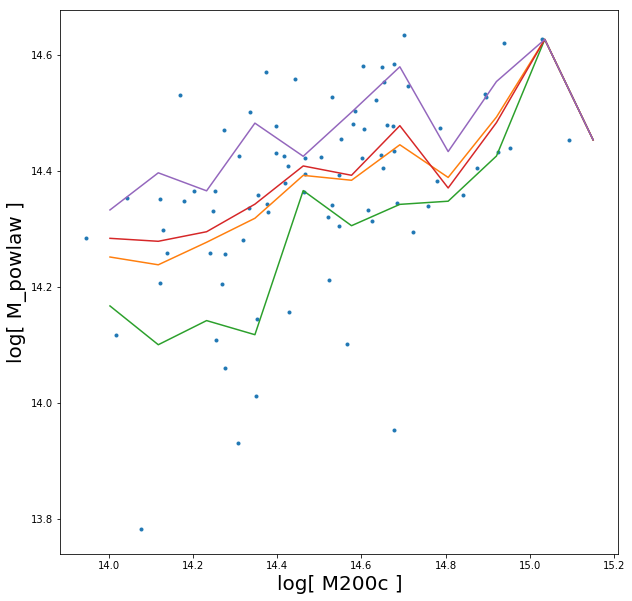

In [14]:
X = np.log10(datares['M200c'].astype('float64'))
Y = np.log10(datares['M_powlaw'].astype('float64'))
plt.plot(X,Y,'.')
plt.xlabel('log[ M200c ]', fontsize=20)
plt.ylabel('log[ M_powlaw ]', fontsize=20)

binnedplot(X,Y,10)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

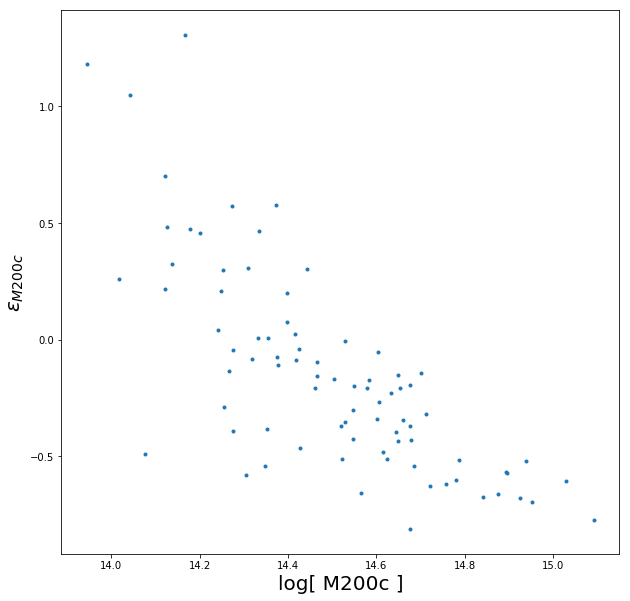

In [8]:
X = np.log10(datares['M200c'].astype('float64'))
Y = (datares['ep_M200c'].astype('float64'))
plt.plot(X,Y,'.')
plt.xlabel('log[ M200c ]', fontsize=20)
plt.ylabel(r'$\epsilon_{M200c}$', fontsize=20)

plothist(X,Y,10)

cluster index: 20
velocity standard deviation: 690.939
cluster M500 from SZ: 2.912e+14
cluster M200c: 4.13e+14


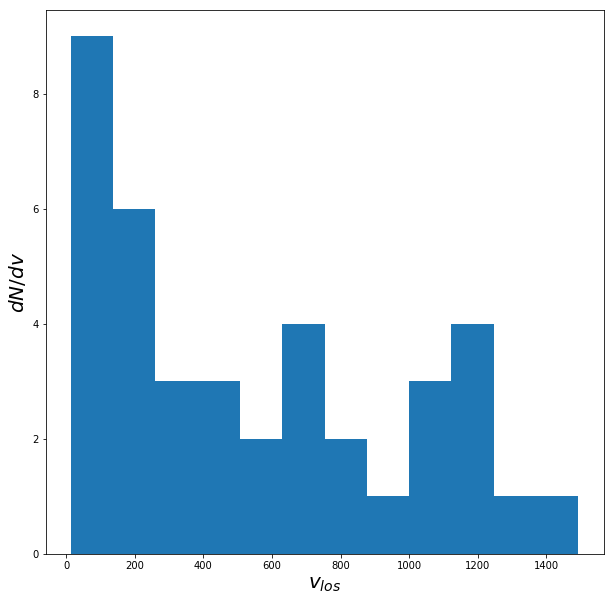

In [9]:
n = 20

Ngal = dat['Ngal'][n]
vlos = dat['vlos'][n][0:Ngal]

h = plt.hist(np.absolute(vlos), 12)
plt.xlabel(r'$v_{los}$', fontsize=20)
plt.ylabel(r'$dN/dv$', fontsize=20)

print('cluster index:', n)
print('velocity standard deviation:', np.std(dat['vlos'][n][0:Ngal])) 
print ('cluster M500 from SZ:', dat['MSZ'][n])
print ('cluster M200c:', dat['Mtot'][n])

# Using HeCS to train SDM

In [10]:
type(dat)

for n in range(len(dat)):
    Ngal = dat['Ngal'][n]
    
    velsigma = np.std(dat['vlos'][n][0:Ngal])
    m500 = dat['MSZ'][n]
    m200c = dat['Mtot'][n]
    
    datasum.loc[n] = pd.Series({'velsigma':velsigma ,
                                'M500_SZ' : m500 ,
                                'M200c' : m200c })

In [11]:
dat = np.load('./data/HeCS_pared_small.npy')

featuresList = []
massList = []

numHalos = len(dat)

#loop through all of the halos
for h in range(numHalos):
        numSubs = dat['Ngal'][h]
        
        #make a numpy array that will hold, in this case, 3 features for each of the numSubs subhalos.  Be aware that SDM requires at least 2 dimensions, so if you want to use line of sight velocity, you'll have to fill in a dummy value for the 2nd dimension.  I used an array of 1.0's
        subfeat = np.zeros((numSubs, 2), 'f')
        
        #loop through the subhalos/galaxies in this halo:
        for sh in range (0, numSubs):
            #and fill in each of the features
            subfeat[sh][0] = np.abs(dat['vlos'][h][sh])
            subfeat[sh][1] = 1.0

        #append the numpy array of features to the featuresList
        featuresList.append(subfeat)
        #and the mass to the massList
        massList.append(dat['Mtot'])

#turn this into a features object:
# features = sdm.Features(featuresList, mass=massList)

#model.crossvalidate is the workhorse.  It will do the 10-fold crossvalidation to predict answers for all of your data.  It outputs root mean squared error (rmse) and mass predictions:
# rmse, predictions = model.crossvalidate(trainData, trainData.mass)

KeyboardInterrupt: 

In [19]:
tempres = np.load('./tempresults.npy', encoding='latin1').item()
tempres.keys()

['feat', 'mass', 'predictions', 'rmse']

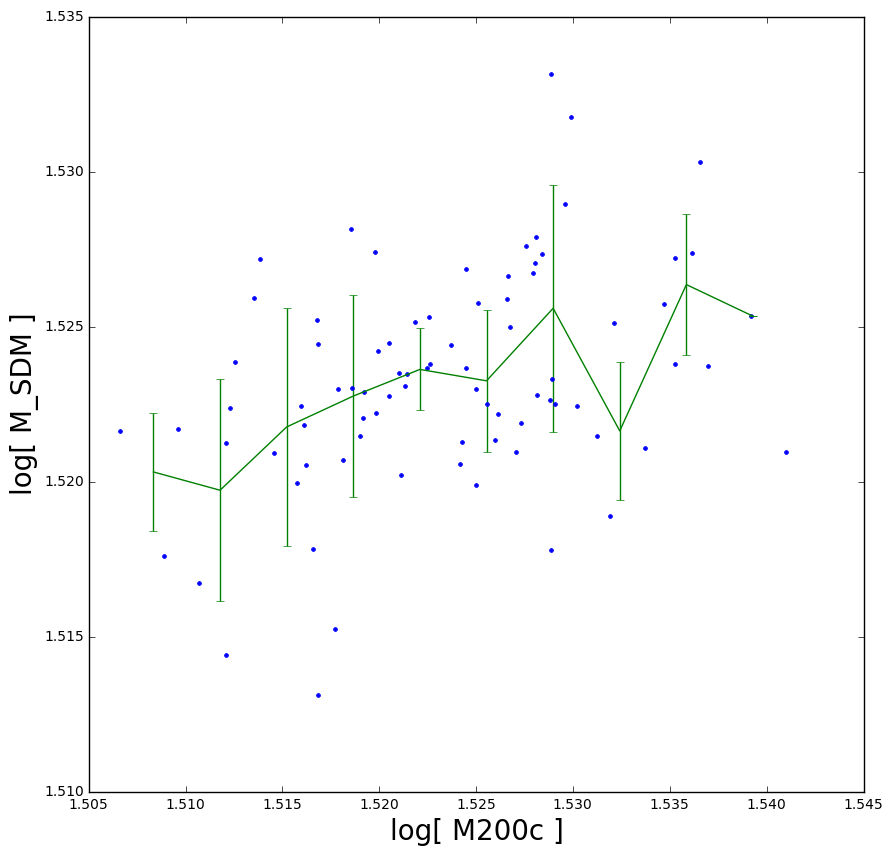

In [20]:
X = np.log10(tempres['mass']).astype('float64')
Y = np.log10(tempres['predictions']).astype('float64')
plt.plot(X,Y,'.')
plt.xlabel('log[ M200c ]', fontsize=20)
plt.ylabel('log[ M_SDM ]', fontsize=20)

plothist(X,Y,10)

In [14]:
X.astype

<function astype>

In [4]:
x = np.array([4,5,6,67])
x = np.append(x,124)

x[x<15]

array([4, 5, 6])

# Minghan's Data (coma.p)

In [10]:
comadat = np.load('./data/coma.p')[0]

OSError: Failed to interpret file './data/coma.p' as a pickle

In [ ]:
vlos = []
for i in comadat:
    vlos.append(i[0])
    
h = plt.hist(vlos, 15)
plt.xlabel(r'$v_{los}$', fontsize=20)
plt.ylabel(r'$dN/dv$', fontsize=20)

velsigma_coma = np.std(vlos)
M_pow_coma = (velsigma_coma/sig15)**(1/alpha) * 1.e15

print ('cluster: COMA')
print ('velocity standard deviation:', np.std(vlos))
print ('mass from power law:', "%.4g" % M_pow_coma)